In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline
plt.style.use('seaborn')

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# **Loading dataset** (2 points)

First, let's take a look on data.

In [2]:
# load train and test files
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

# check df shapes
df = train+test
train.shape, test.shape, df.shape

((5282, 20), (1761, 19), (5282, 20))

In [3]:
print(f'Our train dataset has {train.shape[1]} feautures and {train.shape[0]} entries, including our target feature - {train.columns[-1]}. Test dataset has {test.shape[1]} feautures and {test.shape[0]} entries.')

Our train dataset has 20 feautures and 5282 entries, including our target feature - Churn. Test dataset has 19 feautures and 1761 entries.


In [4]:
# let`s take a look how the 1st 10 samples look like

train.head(10)


,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0
5,25,19.80,475.2,Female,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
6,27,90.15,2423.4,Female,0,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,Yes,Month-to-month,No,Bank transfer (automatic),0
7,1,45.70,45.7,Male,0,No,No,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,1
8,50,105.95,5341.8,Male,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,No,Yes,No,Yes,Yes,Month-to-month,No,Credit card (automatic),1
9,72,61.20,4390.25,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),0


In [5]:
# or random 10 samples

train.sample(10)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
200,35,91.50,3236.35,Male,0,Yes,No,Yes,Yes,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Credit card (automatic),0
1906,24,89.55,2187.15,Male,0,No,No,Yes,No,Fiber optic,No,Yes,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,0
2409,30,104.10,3121.1,Female,1,No,No,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,0
1356,41,74.55,3023.55,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),0
5031,1,69.10,69.1,Female,0,Yes,Yes,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,1
4442,15,25.05,369.1,Female,0,No,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),0
4188,49,97.95,4917.9,Male,0,Yes,Yes,Yes,Yes,Fiber optic,No,No,No,Yes,Yes,Yes,One year,Yes,Electronic check,0
4313,36,80.40,2937.65,Female,0,Yes,No,Yes,No,Fiber optic,No,No,No,No,No,Yes,Month-to-month,No,Electronic check,0
4373,1,69.20,69.2,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,1
2563,8,19.65,164.3,Female,1,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,1


In [6]:
# let`s look at summary of the df : columns, value count, dtypes

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [7]:
# we have 2 features `dtypes: objects, int 64
# for our comfort we separate them

num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

# define X(features) and y(target)

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [8]:
# check for NA

train.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

# Data **analysis**

In [9]:
# some EDA

train.describe(include='all')

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
count,5282.000000,5282.000000,5282,5282,5282.000000,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282.000000
unique,NaN,NaN,4978,2,NaN,2,2,2,3,3,3,3,3,3,3,3,3,2,4,NaN
top,NaN,NaN,20.2,Male,NaN,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN
freq,NaN,NaN,9,2655,NaN,2705,3676,4761,2511,2341,2612,2332,2317,2604,2099,2081,2920,3148,1786,NaN
mean,32.397009,64.924754,NaN,NaN,0.159409,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.262022
std,24.550326,30.176464,NaN,NaN,0.366092,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.439776
min,0.000000,18.250000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,9.000000,35.462500,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,29.000000,70.400000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,55.000000,90.050000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000


In [10]:
train[num_cols].describe(include='all')

,ClientPeriod,MonthlySpending,TotalSpent
count,5282.000000,5282.000000,5282
unique,NaN,NaN,4978
top,NaN,NaN,20.2
freq,NaN,NaN,9
mean,32.397009,64.924754,NaN
std,24.550326,30.176464,NaN
min,0.000000,18.250000,NaN
25%,9.000000,35.462500,NaN
50%,29.000000,70.400000,NaN
75%,55.000000,90.050000,NaN


In [11]:
# numerical columns hist

train[num_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ClientPeriod     5282 non-null   int64  
 1   MonthlySpending  5282 non-null   float64
 2   TotalSpent       5282 non-null   object 
dtypes: float64(1), int64(1), object(1)
memory usage: 123.9+ KB


In [12]:
# The different variables present different value ranges, therefore different magnitudes. Also TotalSpent is different dtype. 
# Not only the minimum and maximum values are different, but they also spread over ranges of different widths. We will normalize the dataset, after correcting TotalSpent dtype.

In [13]:
# we cast TotalSpent column to float
# pd.to_numeric(train.TotalSpent,downcast ='float')
# ValueError: Unable to parse string " " at position 1048

train[train.TotalSpent == ' ']

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1048,0,25.75,,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
1707,0,73.35,,Female,0,Yes,Yes,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,0
2543,0,19.70,,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,0
3078,0,80.85,,Female,0,Yes,Yes,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,0
3697,0,20.00,,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4002,0,61.90,,Male,0,No,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),0
4326,0,25.35,,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4551,0,52.55,,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),0
4598,0,56.05,,Female,0,Yes,Yes,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),0


In [14]:
train.TotalSpent = train.TotalSpent.replace(' ', np.nan)

In [15]:
# the same with previously used pd.to_numeric
# train.TotalSpent = pd.to_numeric(train.TotalSpent)

In [16]:
# now we check how many nan values we have == how many replacements we made and think what we can do with it
train.isnull().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  9
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

In [17]:
# investigate this 9 data entries
train[train.TotalSpent.isnull()]

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1048,0,25.75,NaN,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
1707,0,73.35,NaN,Female,0,Yes,Yes,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,0
2543,0,19.70,NaN,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,0
3078,0,80.85,NaN,Female,0,Yes,Yes,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,0
3697,0,20.00,NaN,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4002,0,61.90,NaN,Male,0,No,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),0
4326,0,25.35,NaN,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4551,0,52.55,NaN,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),0
4598,0,56.05,NaN,Female,0,Yes,Yes,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),0


In [18]:
# all the entries with null in train.TotalSpent also have null in train.ClientPeriod
# NB! need to decide: fill in with values(mean/predicted) or exclude from train? (0,0017% of train)
test.info()
test[test.TotalSpent== ' ']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              1761 non-null   int64  
 1   MonthlySpending           1761 non-null   float64
 2   TotalSpent                1761 non-null   object 
 3   Sex                       1761 non-null   object 
 4   IsSeniorCitizen           1761 non-null   int64  
 5   HasPartner                1761 non-null   object 
 6   HasChild                  1761 non-null   object 
 7   HasPhoneService           1761 non-null   object 
 8   HasMultiplePhoneNumbers   1761 non-null   object 
 9   HasInternetService        1761 non-null   object 
 10  HasOnlineSecurityService  1761 non-null   object 
 11  HasOnlineBackup           1761 non-null   object 
 12  HasDeviceProtection       1761 non-null   object 
 13  HasTechSupportAccess      1761 non-null   object 
 14  HasOnlin

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
177,0,19.85,,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check
767,0,20.25,,Male,0,No,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check


In [19]:
# ok, we will fill in the values..
# theory: it is new clients, that has period 0 and accordingly 0 in totalspent
  # we can just use 0

train.TotalSpent = train.TotalSpent.replace(np.nan, 0)
train.TotalSpent = train.TotalSpent.astype(float)
train.ClientPeriod = train.ClientPeriod.astype(float)
train.IsSeniorCitizen = train.IsSeniorCitizen.astype(object)
train[train.ClientPeriod==0]

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1048,0.0,25.75,0.0,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
1707,0.0,73.35,0.0,Female,0,Yes,Yes,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,0
2543,0.0,19.70,0.0,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,0
3078,0.0,80.85,0.0,Female,0,Yes,Yes,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,0
3697,0.0,20.00,0.0,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4002,0.0,61.90,0.0,Male,0,No,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),0
4326,0.0,25.35,0.0,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4551,0.0,52.55,0.0,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),0
4598,0.0,56.05,0.0,Female,0,Yes,Yes,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),0


In [20]:
test.TotalSpent = train.TotalSpent.replace(np.nan, 0)
test.TotalSpent = train.TotalSpent.astype(float)
test.ClientPeriod = train.ClientPeriod.astype(float)
test.IsSeniorCitizen = train.IsSeniorCitizen.astype(object)
test.info()
train[train.ClientPeriod==0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              1761 non-null   float64
 1   MonthlySpending           1761 non-null   float64
 2   TotalSpent                1761 non-null   float64
 3   Sex                       1761 non-null   object 
 4   IsSeniorCitizen           1761 non-null   object 
 5   HasPartner                1761 non-null   object 
 6   HasChild                  1761 non-null   object 
 7   HasPhoneService           1761 non-null   object 
 8   HasMultiplePhoneNumbers   1761 non-null   object 
 9   HasInternetService        1761 non-null   object 
 10  HasOnlineSecurityService  1761 non-null   object 
 11  HasOnlineBackup           1761 non-null   object 
 12  HasDeviceProtection       1761 non-null   object 
 13  HasTechSupportAccess      1761 non-null   object 
 14  HasOnlin

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1048,0.0,25.75,0.0,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
1707,0.0,73.35,0.0,Female,0,Yes,Yes,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,0
2543,0.0,19.70,0.0,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,0
3078,0.0,80.85,0.0,Female,0,Yes,Yes,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,0
3697,0.0,20.00,0.0,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4002,0.0,61.90,0.0,Male,0,No,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),0
4326,0.0,25.35,0.0,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4551,0.0,52.55,0.0,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),0
4598,0.0,56.05,0.0,Female,0,Yes,Yes,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),0


In [21]:
# check casting
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   float64
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   float64
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   object 
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

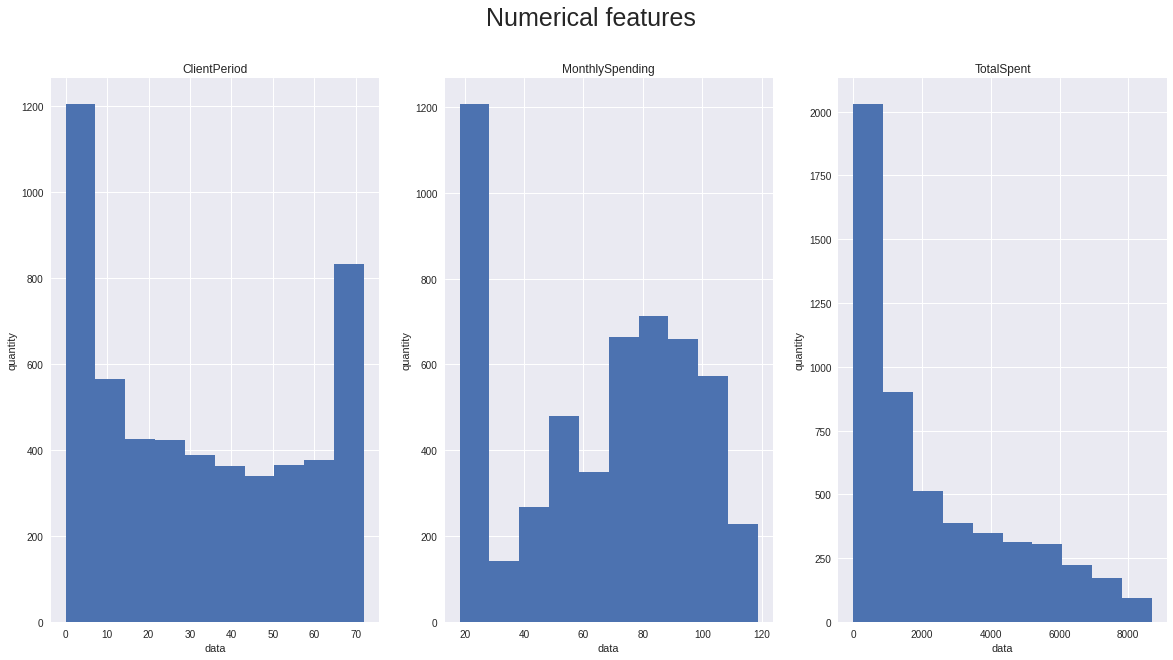

In [22]:
# Vizualizing numerical features

fig, axes = plt.subplots(1,3, figsize = (20,10))
fig.suptitle('Numerical features', fontsize = 25)  

for i, col in enumerate(num_cols):
  plt.subplot(1,3,i+1)
  plt.ylabel('quantity')
  plt.xlabel('data')
  plt.hist(train[col])
  plt.title(col)
plt.show()

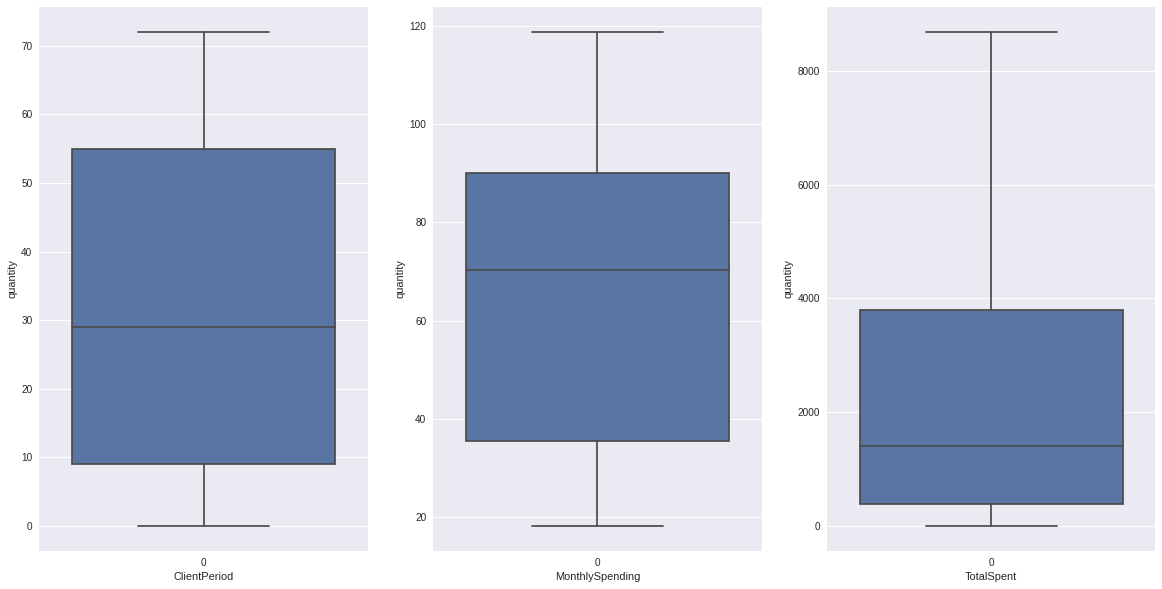

In [23]:
fig = plt.figure(figsize=(20,10))
for i in range(len(num_cols)):
  plt.subplot(1,3,i+1)
  sns.boxplot(data = train[num_cols[i]])
  plt.xlabel(num_cols[i])
  plt.ylabel('quantity')

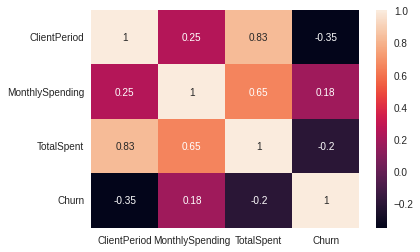

In [24]:
corr = train.corr()
sns.heatmap(corr, annot=True)

0.26202196137826583

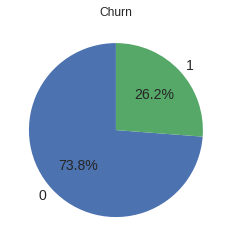

In [25]:
# high correlation between ClientPeriod + TotalSpent => multicollinearity?
  # drop TotalSpent or transform it in new feature

# Our dataset is imbalanced.

plt.title('Churn')
plt.pie(train.Churn.value_counts(), labels=train.Churn.value_counts().index, autopct='%1.1f%%', 
          startangle=90,textprops={'fontsize': 14})
train.Churn.mean()

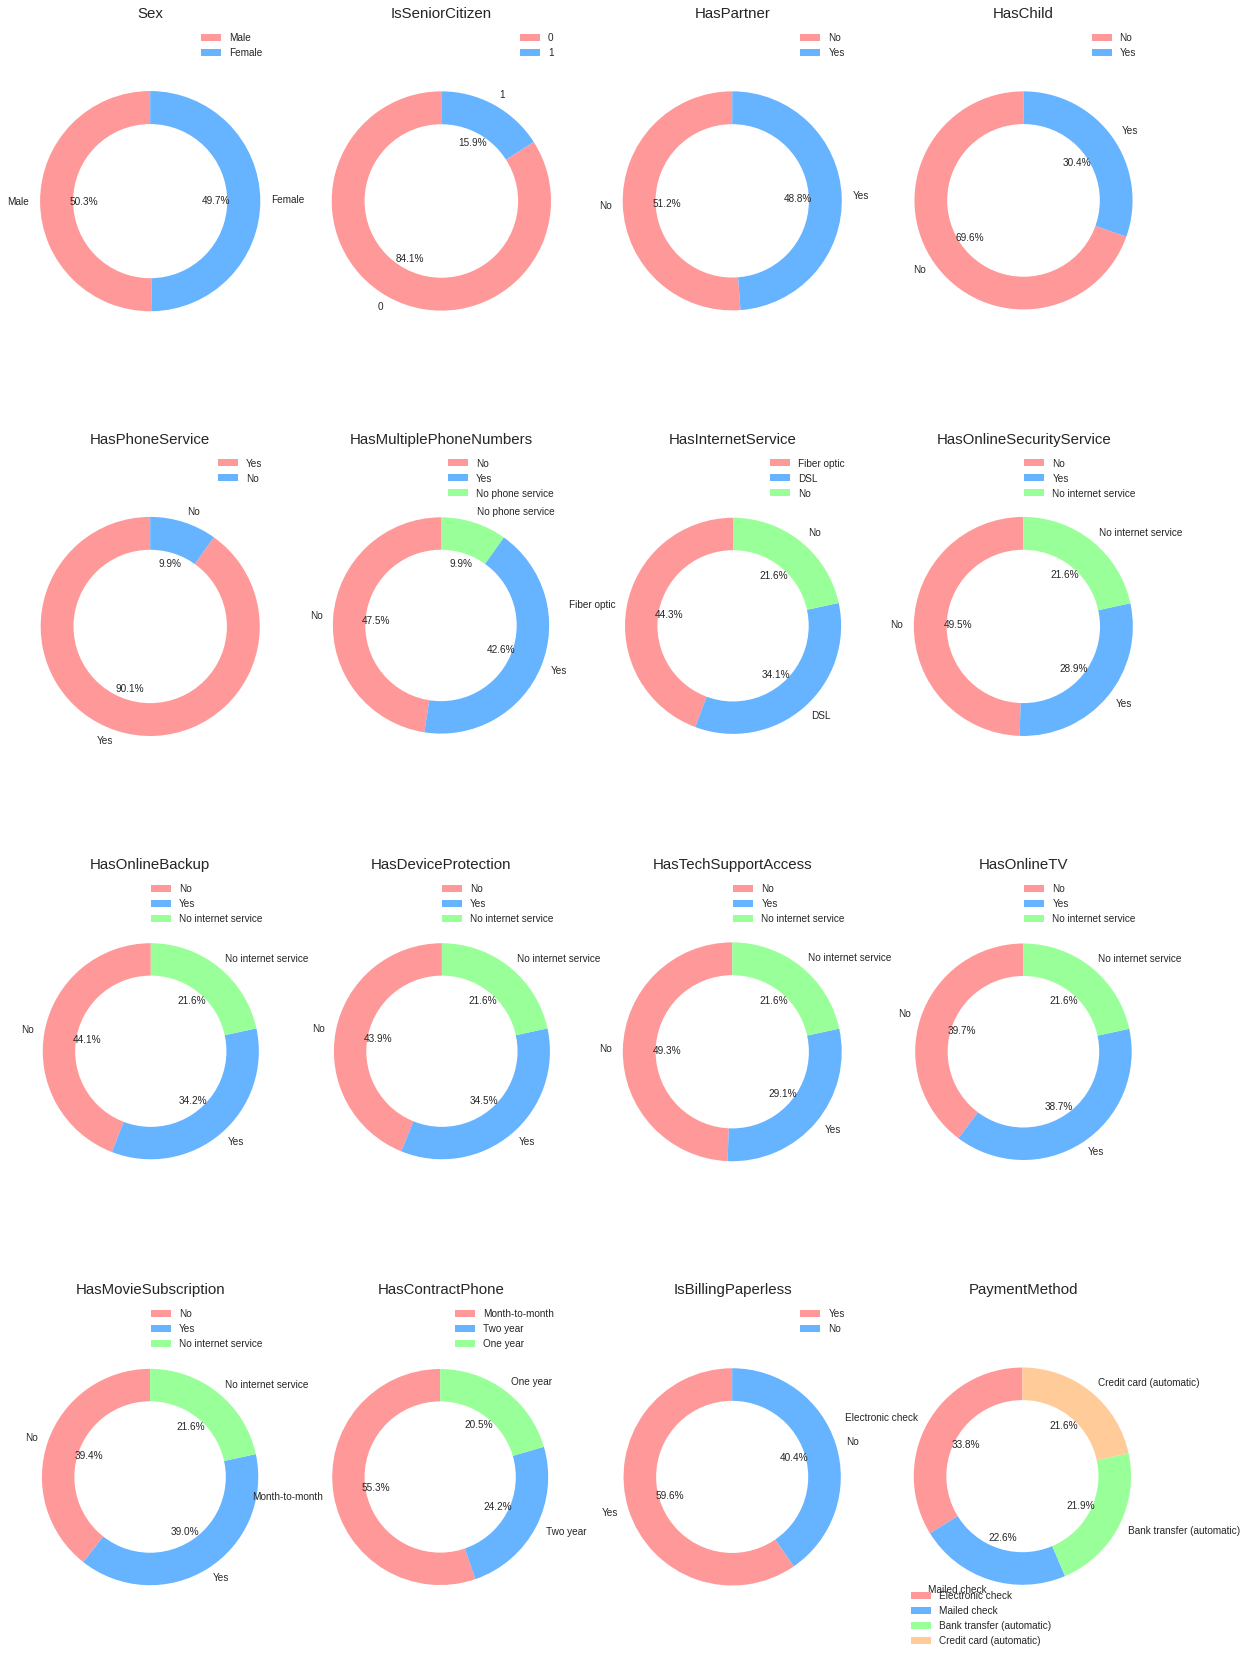

In [26]:
# Vizualize categorical features

fig = plt.figure(figsize=(20,30))
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
for i in range(len(cat_cols)):
  plt.subplot(4,4,i+1)
  plt.pie(train[cat_cols[i]].value_counts(), labels = train[cat_cols[i]].value_counts().index, autopct='%1.1f%%', 
          startangle=90, colors=colors)
  centre_circle = plt.Circle((0,0), 0.70, fc = 'white')
  fig1 = plt.gcf()
  fig1.gca().add_artist(centre_circle)
  plt.axis('equal')
  plt.title(cat_cols[i], fontsize = 15)
  plt.legend()

plt.show()

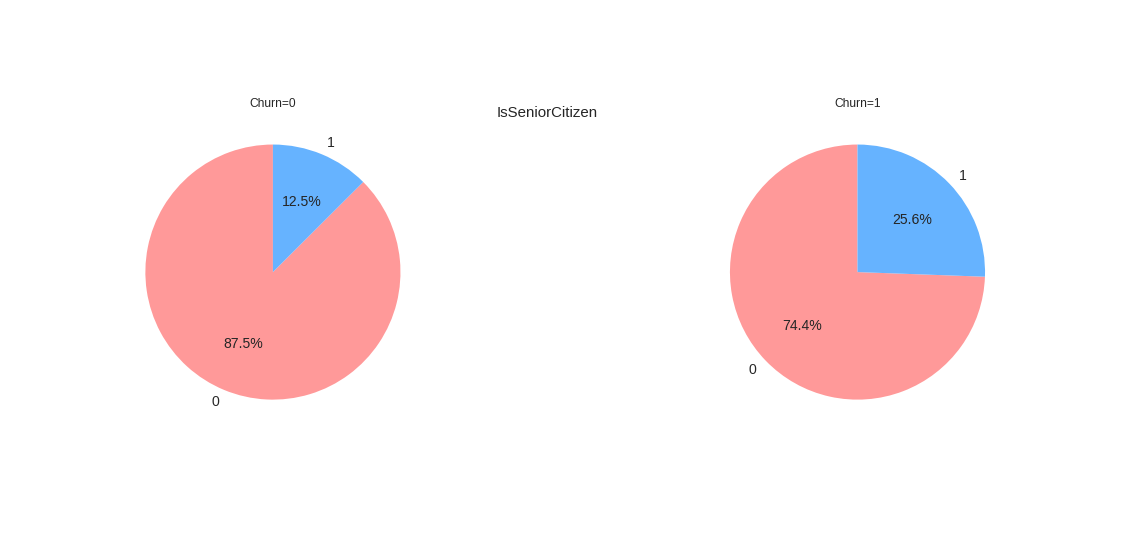

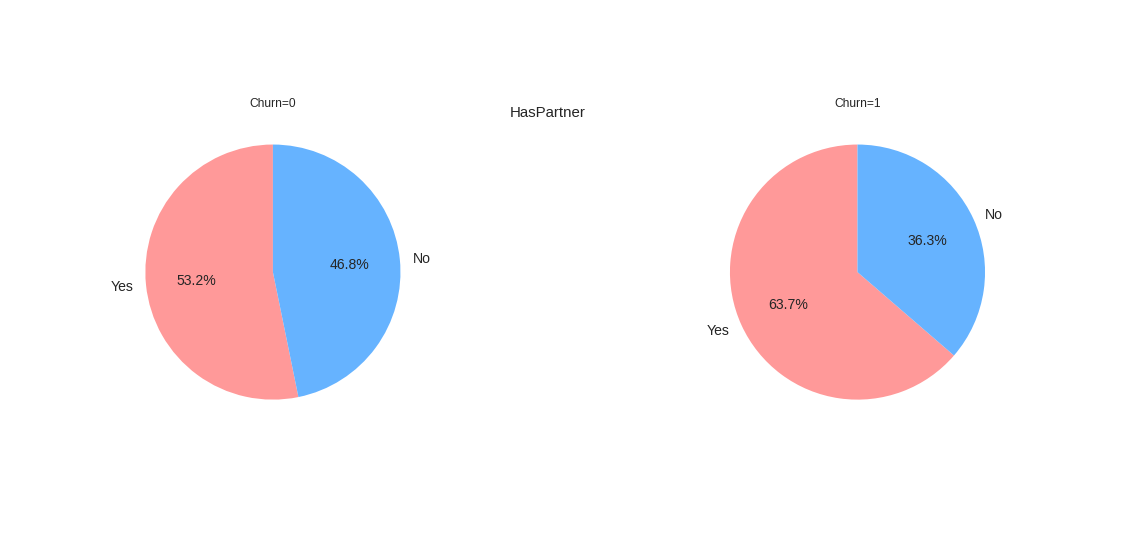

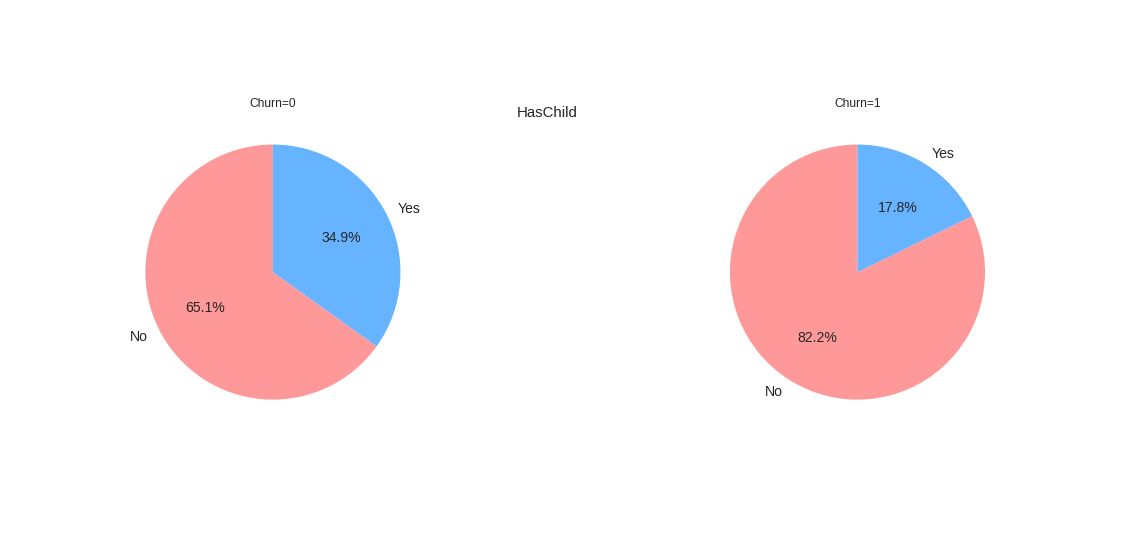

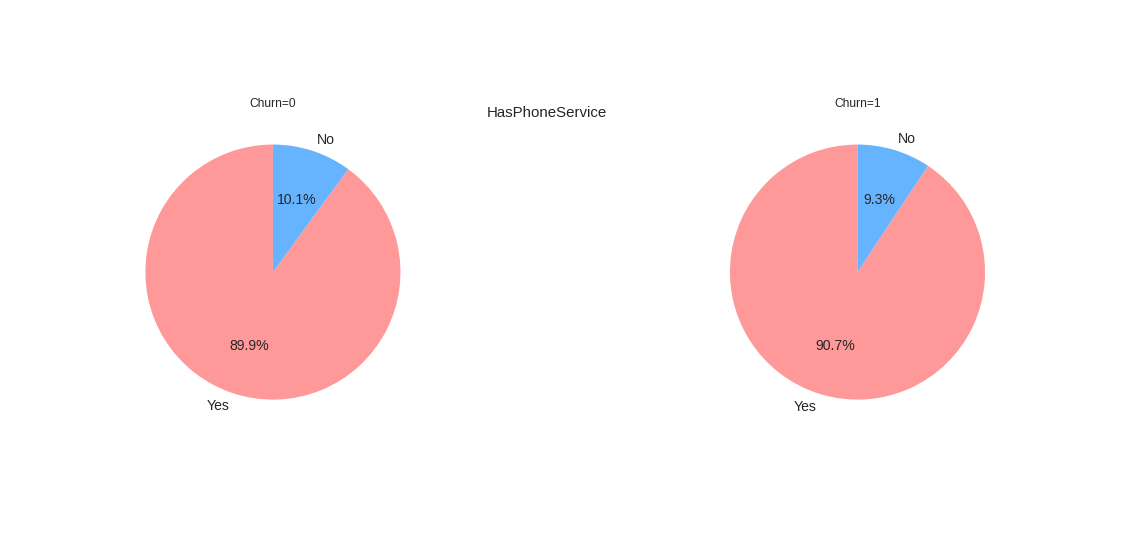

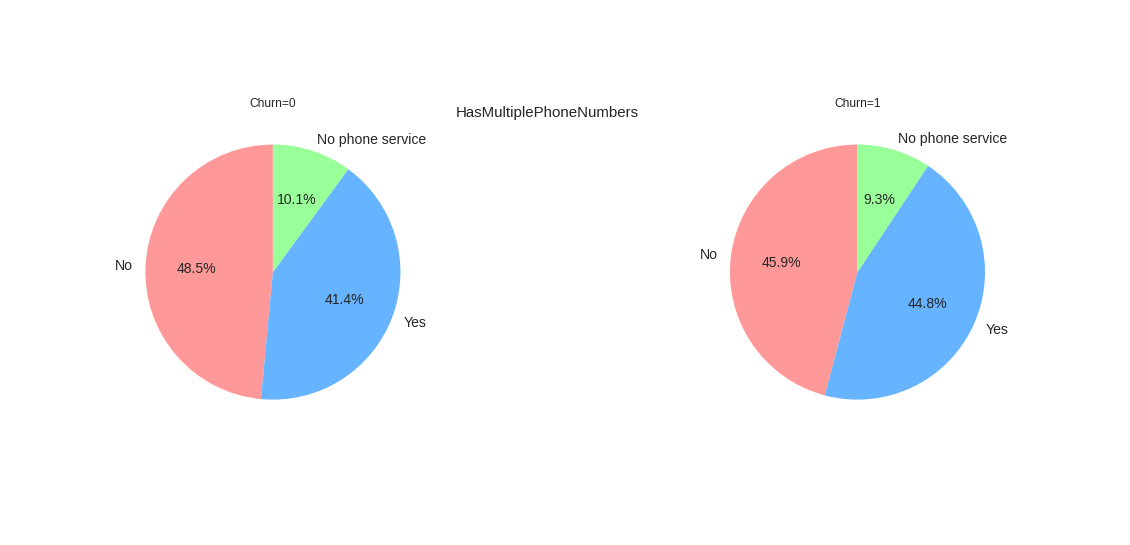

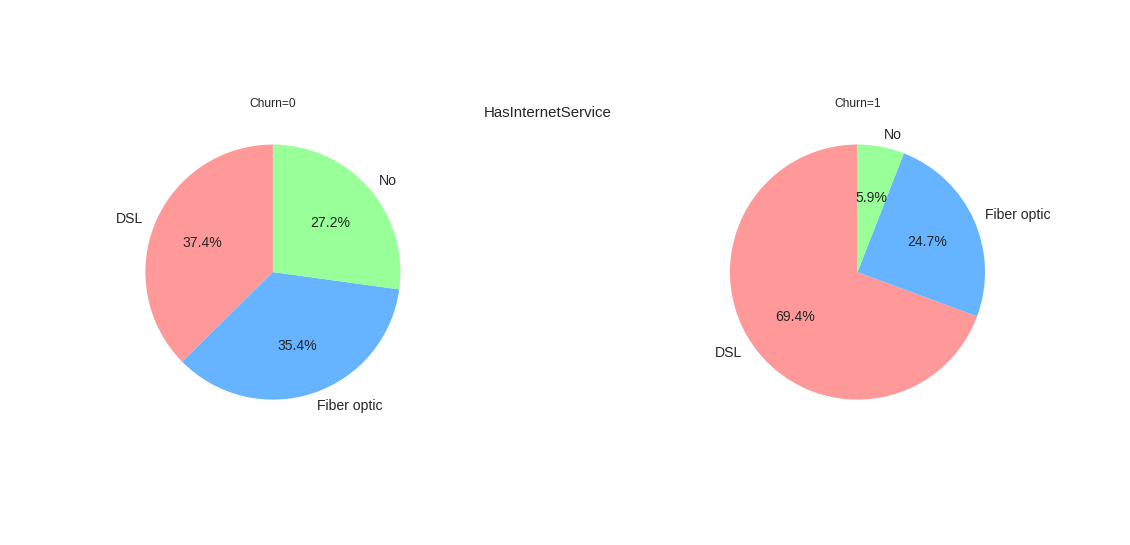

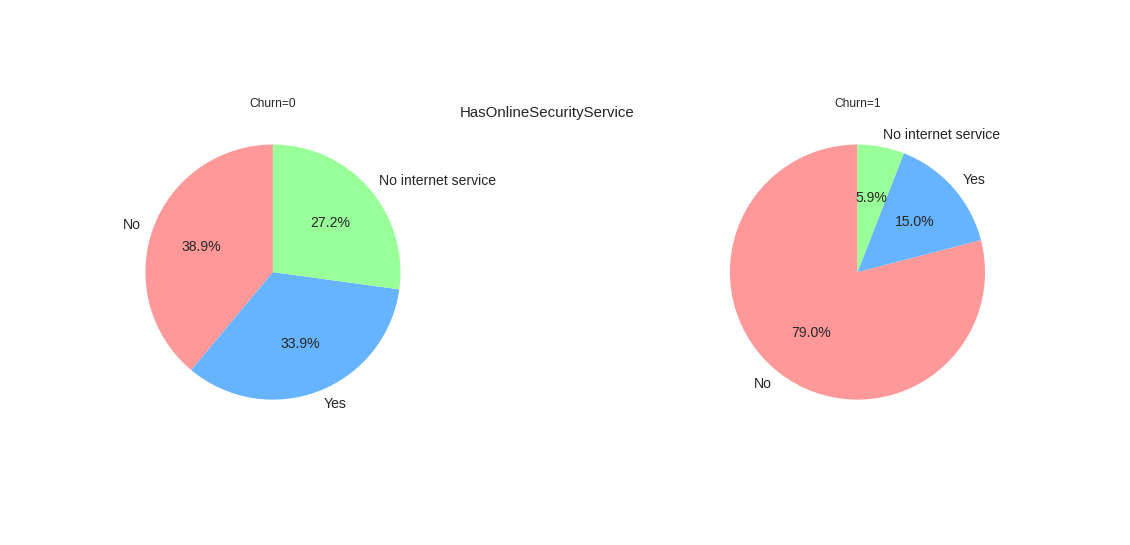

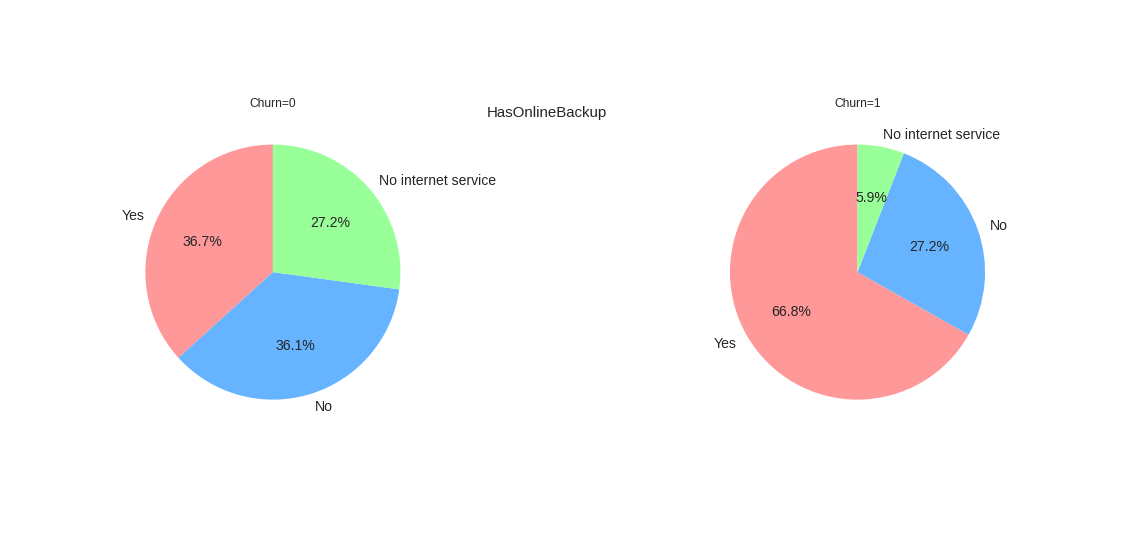

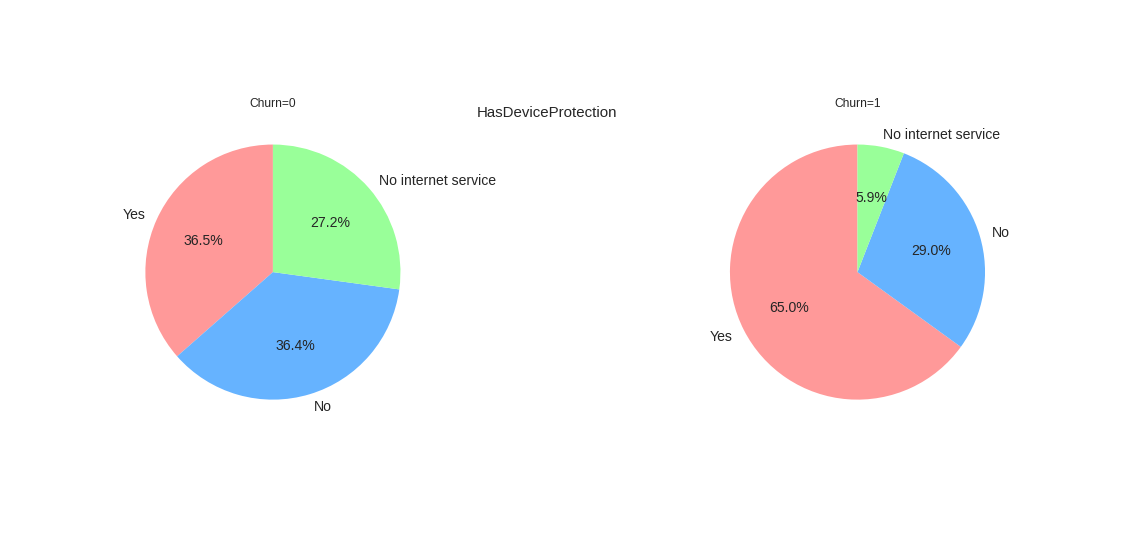

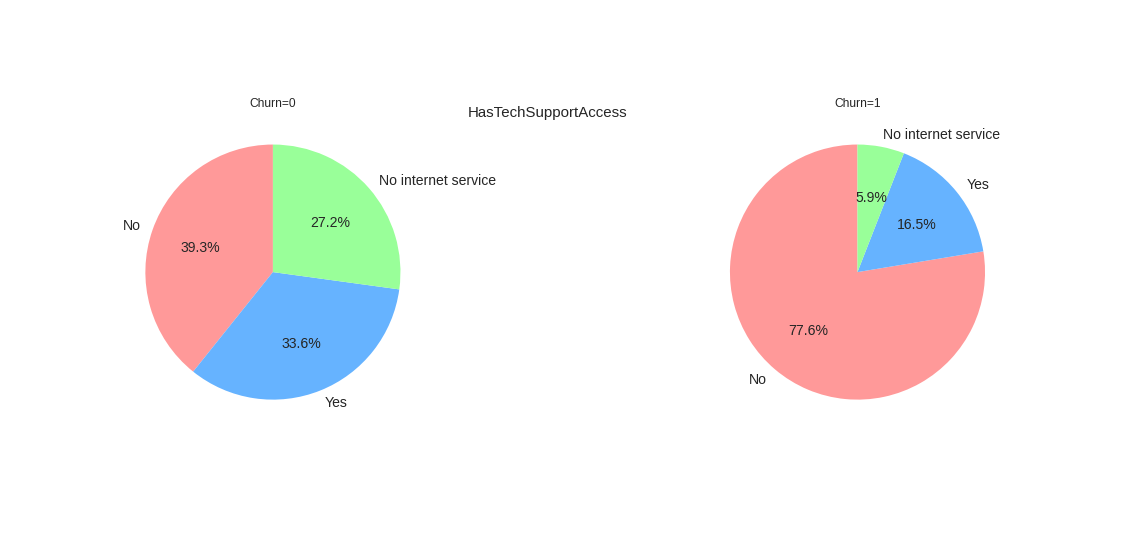

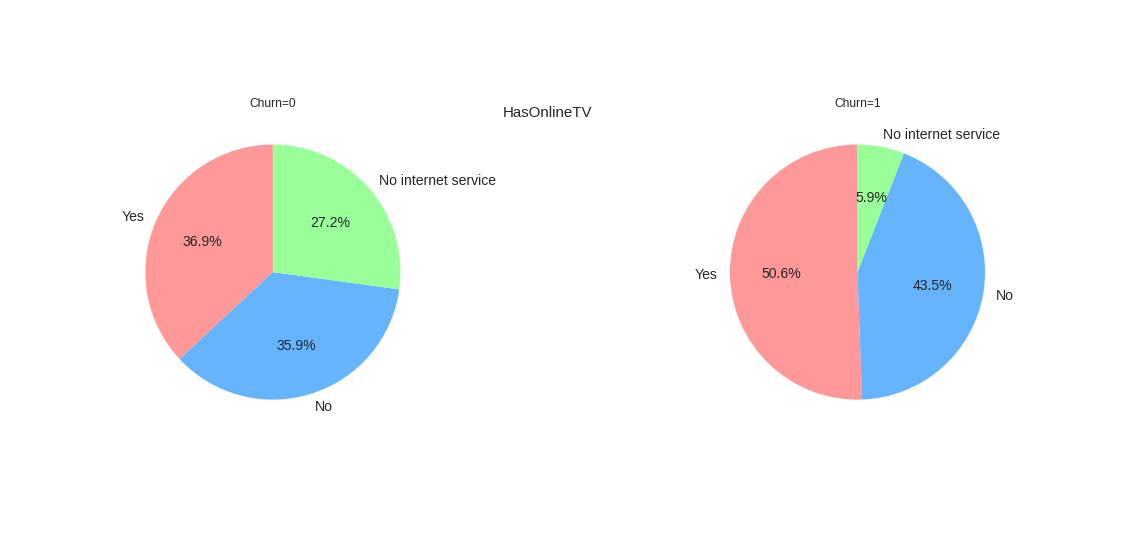

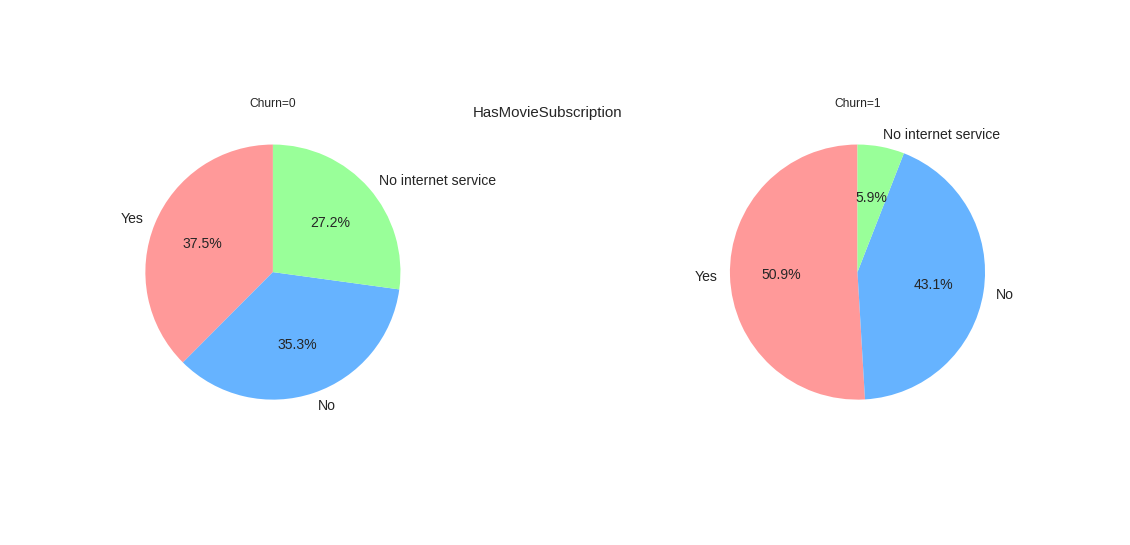

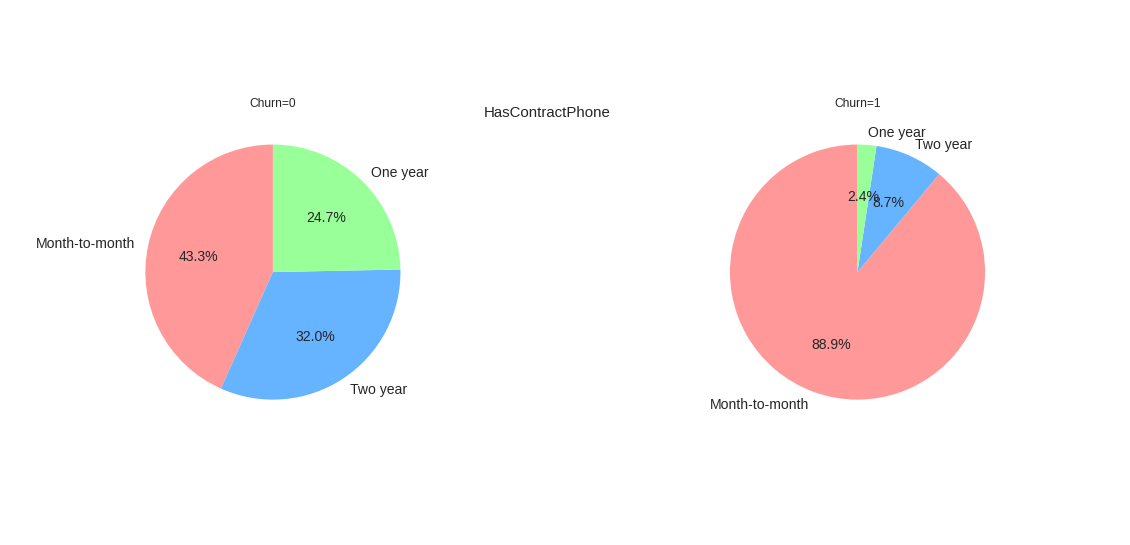

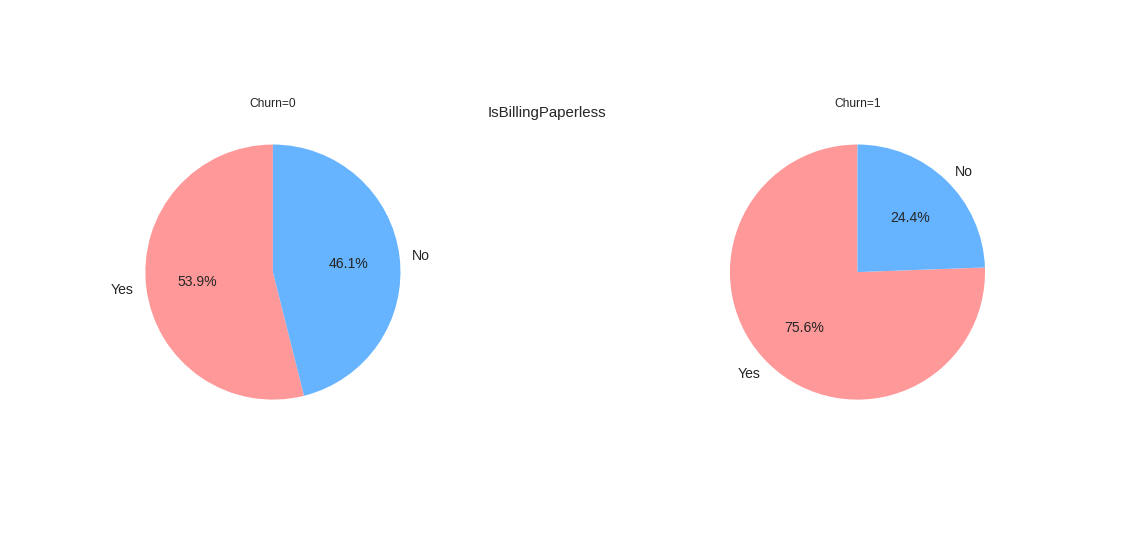

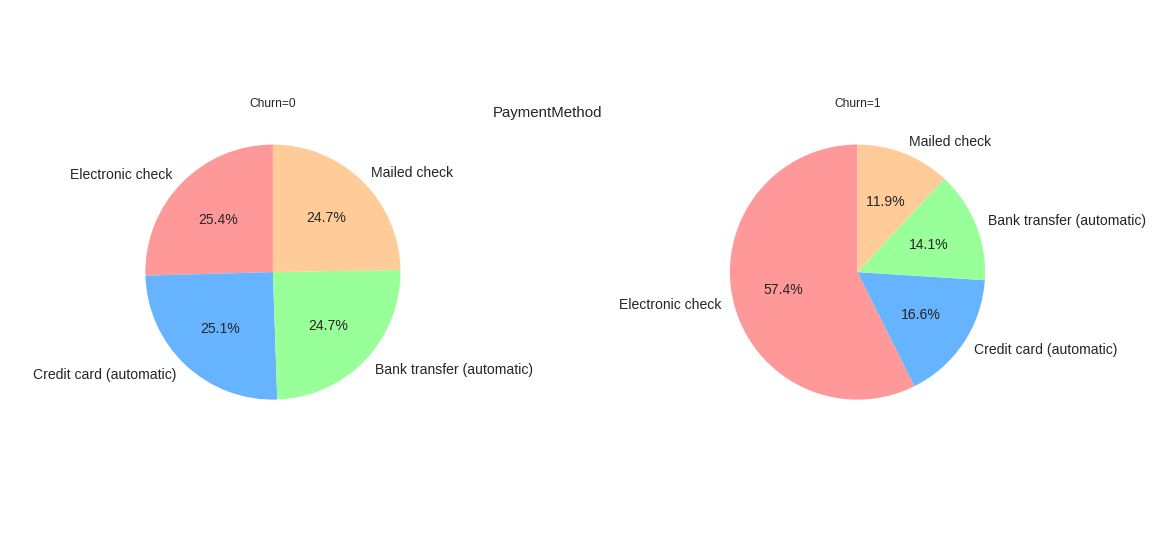

In [27]:
# Vizualize categorical features, depending to the Churn

for i in range(1,len(cat_cols)):
  #plt.title('Churn = 0 vs Churn = 1')
  fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,30))
  fig.suptitle(cat_cols[i], fontsize=15, y=0.58)

  ax1.pie(train[cat_cols[i]][train.Churn==0].value_counts(), labels=train[cat_cols[i]][train.Churn==0].value_counts().index, autopct='%1.1f%%', 
          startangle=90, colors=colors, radius=0.6, textprops={'fontsize': 14})
  ax1.set_title('Churn=0', y=0.8)
  ax2.pie(train[cat_cols[i]][train.Churn==1].value_counts(), labels=train[cat_cols[i]][train.Churn==0].value_counts().index, autopct='%1.1f%%', 
          startangle=90, colors=colors,radius=0.6,textprops={'fontsize': 14})
  ax2.set_title('Churn=1',y=0.8)
  fig.subplots_adjust(wspace=.1)
  plt.show()


<Figure size 360x360 with 0 Axes>

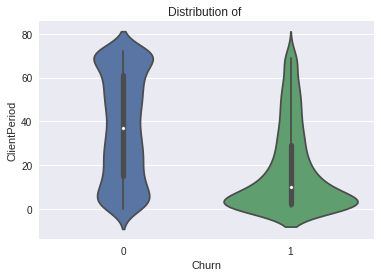

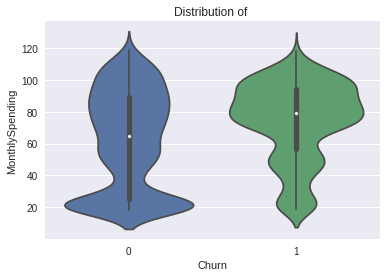

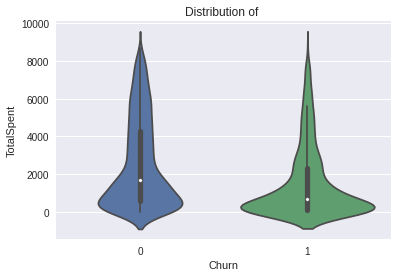

In [28]:
# we can see that based on churn clients population are different.
# but lets make it more visual
num_cols 

plt.figure(figsize=(5,5))
for col in num_cols:
  plt.subplots(1,1)
  sns.violinplot(data = train, x = train.Churn, y = f'{col}').set_title('Distribution of ')

plt.show()


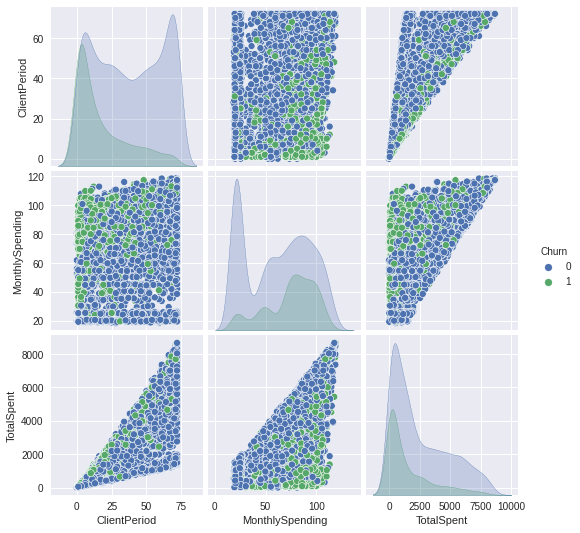

In [29]:
sns.pairplot(train[num_cols+[target_col]], vars= num_cols, hue=target_col)

In [30]:
train['TotalTransformed'] = (train.TotalSpent - train.ClientPeriod*train.MonthlySpending)
train.drop('TotalSpent', inplace = True, axis=1)
train.corr()

,ClientPeriod,MonthlySpending,Churn,TotalTransformed
ClientPeriod,1.000000,0.249414,-0.350640,0.002450
MonthlySpending,0.249414,1.000000,0.184769,-0.008076
Churn,-0.350640,0.184769,1.000000,0.012816
TotalTransformed,0.002450,-0.008076,0.012816,1.000000


In [31]:
test['TotalTransformed'] = (test.TotalSpent - test.ClientPeriod*test.MonthlySpending)
test.drop('TotalSpent', inplace = True, axis=1)

In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   float64
 1   MonthlySpending           5282 non-null   float64
 2   Sex                       5282 non-null   object 
 3   IsSeniorCitizen           5282 non-null   object 
 4   HasPartner                5282 non-null   object 
 5   HasChild                  5282 non-null   object 
 6   HasPhoneService           5282 non-null   object 
 7   HasMultiplePhoneNumbers   5282 non-null   object 
 8   HasInternetService        5282 non-null   object 
 9   HasOnlineSecurityService  5282 non-null   object 
 10  HasOnlineBackup           5282 non-null   object 
 11  HasDeviceProtection       5282 non-null   object 
 12  HasTechSupportAccess      5282 non-null   object 
 13  HasOnlineTV               5282 non-null   object 
 14  HasMovie

In [33]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              1761 non-null   float64
 1   MonthlySpending           1761 non-null   float64
 2   Sex                       1761 non-null   object 
 3   IsSeniorCitizen           1761 non-null   object 
 4   HasPartner                1761 non-null   object 
 5   HasChild                  1761 non-null   object 
 6   HasPhoneService           1761 non-null   object 
 7   HasMultiplePhoneNumbers   1761 non-null   object 
 8   HasInternetService        1761 non-null   object 
 9   HasOnlineSecurityService  1761 non-null   object 
 10  HasOnlineBackup           1761 non-null   object 
 11  HasDeviceProtection       1761 non-null   object 
 12  HasTechSupportAccess      1761 non-null   object 
 13  HasOnlineTV               1761 non-null   object 
 14  HasMovie

# Preprocessing


In [62]:
# norm num_cols + one-hot-enc cat_cols

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder, QuantileTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import roc_auc_score, roc_curve

In [35]:
train_copy = train.copy(deep=True)
test_copy = test.copy(deep=True)
y = train_copy['Churn']

train_copy = train_copy.drop('Churn', axis=1)
train_copy.info()
num_cols = train_copy.dtypes[train_copy.dtypes=='float64'].keys()
num_cols

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   float64
 1   MonthlySpending           5282 non-null   float64
 2   Sex                       5282 non-null   object 
 3   IsSeniorCitizen           5282 non-null   object 
 4   HasPartner                5282 non-null   object 
 5   HasChild                  5282 non-null   object 
 6   HasPhoneService           5282 non-null   object 
 7   HasMultiplePhoneNumbers   5282 non-null   object 
 8   HasInternetService        5282 non-null   object 
 9   HasOnlineSecurityService  5282 non-null   object 
 10  HasOnlineBackup           5282 non-null   object 
 11  HasDeviceProtection       5282 non-null   object 
 12  HasTechSupportAccess      5282 non-null   object 
 13  HasOnlineTV               5282 non-null   object 
 14  HasMovie

Index(['ClientPeriod', 'MonthlySpending', 'TotalTransformed'], dtype='object')

In [36]:
train_encoded = pd.get_dummies(train_copy[cat_cols])
test_encoded = pd.get_dummies(test_copy[cat_cols])

In [37]:
scaler = StandardScaler()

train_scaled = scaler.fit_transform(train[num_cols])
test_scaled = scaler.fit_transform(test[num_cols])

In [38]:
train_new = pd.concat([pd.DataFrame(columns=num_cols, data=train_scaled), train_encoded.reset_index(drop=True)], axis=1)
test_new = pd.concat([pd.DataFrame(columns=num_cols, data=test_scaled), test_encoded.reset_index(drop=True)], axis=1)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(train_new, y, train_size = 0.8)

In [40]:
train_new

,ClientPeriod,MonthlySpending,TotalTransformed,Sex_Female,Sex_Male,IsSeniorCitizen_0,IsSeniorCitizen_1,HasPartner_No,HasPartner_Yes,HasChild_No,HasChild_Yes,HasPhoneService_No,HasPhoneService_Yes,HasMultiplePhoneNumbers_No,HasMultiplePhoneNumbers_No phone service,HasMultiplePhoneNumbers_Yes,HasInternetService_DSL,HasInternetService_Fiber optic,HasInternetService_No,HasOnlineSecurityService_No,HasOnlineSecurityService_No internet service,HasOnlineSecurityService_Yes,HasOnlineBackup_No,HasOnlineBackup_No internet service,HasOnlineBackup_Yes,HasDeviceProtection_No,HasDeviceProtection_No internet service,HasDeviceProtection_Yes,HasTechSupportAccess_No,HasTechSupportAccess_No internet service,HasTechSupportAccess_Yes,HasOnlineTV_No,HasOnlineTV_No internet service,HasOnlineTV_Yes,HasMovieSubscription_No,HasMovieSubscription_No internet service,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.920767,-1.505447,-0.671570,0,1,1,0,0,1,0,1,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1
1,1.613288,-1.294998,0.171452,0,1,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0
2,-1.279005,0.363737,0.009190,0,1,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
3,-0.016173,0.476418,0.487124,1,0,0,1,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1
4,1.124450,1.667856,-2.300083,1,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,-1.197532,-1.144204,-0.124306,0,1,1,0,1,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0
5278,0.717084,-0.678565,-0.493082,0,1,1,0,0,1,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,1,0,0,0
5279,-1.279005,-0.327265,0.009190,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1
5280,-0.138382,0.367051,0.175139,1,0,1,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0


# **Logistic Regression Model**

In [41]:
# Logistic regression

LogReg = LogisticRegression()

params = {
    'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : [0.001, 0.01, 0.1, 1, 10, 100],
    'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}


In [42]:
%%time

LogReg_GS = GridSearchCV(LogReg, params, cv = 5, verbose=False, scoring = 'roc_auc', n_jobs = -1)
LogReg_GS.fit(X_train, y_train)

CPU times: user 1.6 s, sys: 120 ms, total: 1.72 s
Wall time: 31.7 s


In [43]:
LogReg_GS.best_params_, LogReg_GS.score(X_train,y_train)

({'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}, 0.8428692809201874)

In [44]:
# test best params 
roc_auc_train = roc_auc_score(y_train, LogReg_GS.predict_proba(X_train)[:,1])
#roc_auc_test = roc_auc_score(y_test, LogReg_GS.predict_proba(X_test)[:,1])
roc_auc_train, #roc_auc_test

(0.8428692809201874,)

# **Cat Boost**


In [45]:
!pip install catboost

     |████████████████████████████████| 76.4 MB 22 kB/s 


In [46]:
from catboost import CatBoostClassifier, Pool

In [47]:
X_train_CB, X_test_CB, y_train_CB, y_test_CB = train_test_split(train_copy, y, train_size=0.8, random_state=42)

In [48]:
X_train_CB

,ClientPeriod,MonthlySpending,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,TotalTransformed
4556,31.0,73.55,Female,1,No,No,Yes,No,Fiber optic,Yes,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),-185.40
1468,59.0,100.05,Female,0,Yes,No,Yes,No,Fiber optic,No,Yes,No,Yes,Yes,Yes,Two year,Yes,Mailed check,131.90
3142,60.0,99.00,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,No,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,77.90
2093,6.0,73.85,Female,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,-41.80
1505,72.0,24.75,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),77.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3092,14.0,91.65,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Electronic check,17.90
3772,19.0,73.20,Female,0,Yes,No,Yes,No,Fiber optic,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,50.30
5191,50.0,20.55,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),42.75
5226,8.0,84.50,Male,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,No,Bank transfer (automatic),-13.35


In [49]:
cat_model = CatBoostClassifier(cat_features=cat_cols, eval_metric='AUC')


In [50]:
cat_model.fit(X_train_CB,y_train_CB)

Learning rate set to 0.019062
0:	total: 66.1ms	remaining: 1m 6s
1:	total: 79.7ms	remaining: 39.8s
2:	total: 93.9ms	remaining: 31.2s
3:	total: 108ms	remaining: 26.9s
4:	total: 122ms	remaining: 24.3s
5:	total: 136ms	remaining: 22.5s
6:	total: 149ms	remaining: 21.2s
7:	total: 162ms	remaining: 20.1s
8:	total: 166ms	remaining: 18.3s
9:	total: 185ms	remaining: 18.3s
10:	total: 201ms	remaining: 18.1s
11:	total: 209ms	remaining: 17.2s
12:	total: 229ms	remaining: 17.4s
13:	total: 239ms	remaining: 16.9s
14:	total: 257ms	remaining: 16.8s
15:	total: 270ms	remaining: 16.6s
16:	total: 281ms	remaining: 16.2s
17:	total: 296ms	remaining: 16.1s
18:	total: 302ms	remaining: 15.6s
19:	total: 308ms	remaining: 15.1s
20:	total: 316ms	remaining: 14.7s
21:	total: 328ms	remaining: 14.6s
22:	total: 341ms	remaining: 14.5s
23:	total: 355ms	remaining: 14.4s
24:	total: 364ms	remaining: 14.2s
25:	total: 379ms	remaining: 14.2s
26:	total: 395ms	remaining: 14.2s
27:	total: 413ms	remaining: 14.3s
28:	total: 427ms	remainin

In [51]:
cat_model.predict_proba(X_train_CB)[:,1], cat_model.predict_proba(X_test_CB)[:,1]

(array([0.17578228, 0.04138317, 0.39707964, ..., 0.00477284, 0.58438548,
        0.03271586]),
 array([0.57725387, 0.18383972, 0.23766848, ..., 0.64921332, 0.01212208,
        0.00964854]))

In [52]:
cat_roc_auc_train = roc_auc_score(y_train_CB, cat_model.predict_proba(X_train_CB)[:,1])
cat_roc_auc_test = roc_auc_score(y_test_CB, cat_model.predict_proba(X_test_CB)[:,1])
cat_roc_auc_train, cat_roc_auc_test

(0.9042123263646308, 0.8280492422493327)

In [53]:
cat_params = {'iterations': [100, 500,100],
              'depth':[3,5,7],
              'min_data_in_leaf': [90, 95, 100],
              'learning_rate': [0.1, 0.2, 0.3]}
cat_model_GS = CatBoostClassifier(cat_features=cat_cols, random_seed=42, verbose = False, eval_metric='AUC')
cat_GS = cat_model_GS.grid_search(cat_params, X_train_CB, y=y_train_CB)


bestTest = 0.8412051415
bestIteration = 97

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
0:	loss: 0.8412051	best: 0.8412051 (0)	total: 436ms	remaining: 34.9s

bestTest = 0.838793277
bestIteration = 77

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
1:	loss: 0.8387933	best: 0.8412051 (0)	total: 849ms	remaining: 33.6s

bestTest = 0.8389442432
bestIteration = 46

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
2:	loss: 0.8389442	best: 0.8412051 (0)	total: 1.27s	remaining: 33.1s

bestTest = 0.8419024615
bestIteration = 148

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
3:	loss: 0.8419025	best: 0.8419025 (3)	total: 4.34s	remaining: 1m 23s

bestTe

In [54]:
cat_GS['params']

{'depth': 3, 'iterations': 500, 'learning_rate': 0.2, 'min_data_in_leaf': 90}

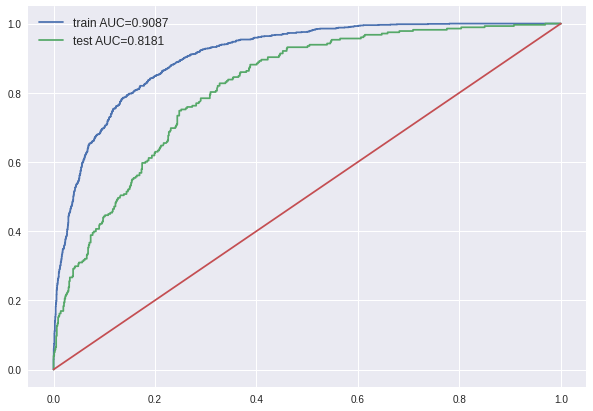

In [73]:
roc_auc_cat_GS_train = roc_auc_score(y_train_CB, cat_model_GS.predict_proba(X_train_CB)[:,1])
roc_auc_cat_GS_test = roc_auc_score(y_test_CB, cat_model_GS.predict_proba(X_test_CB)[:,1])
roc_auc_cat_GS_train, roc_auc_cat_GS_test

plt.figure(figsize=(10,7))
plt.plot(*roc_curve(y_train_CB, cat_model_GS.predict_proba(X_train_CB)[:,1])[:2], label='train AUC={:.4f}'.format(roc_auc_cat_GS_train))
plt.plot(*roc_curve(y_test_CB, cat_model_GS.predict_proba(X_test_CB)[:,1])[:2], label='test AUC={:.4f}'.format(roc_auc_cat_GS_test))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

In [74]:
best_model = CatBoostClassifier(cat_features=cat_cols, verbose = False, depth= 3,iterations = 500, learning_rate = 0.2, min_data_in_leaf = 90)
best_model.fit(train_copy, y)

In [90]:
test = pd.read_csv('/content/test.csv')
submission = pd.read_csv('/content/submission.csv')

test = test.replace(' ', float(0))
test.TotalSpent = test.TotalSpent.astype(float)
test['TotalTransformed'] = (test.TotalSpent - test.ClientPeriod*test.MonthlySpending)
test.drop('TotalSpent', inplace = True, axis=1)

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              1761 non-null   int64  
 1   MonthlySpending           1761 non-null   float64
 2   Sex                       1761 non-null   object 
 3   IsSeniorCitizen           1761 non-null   int64  
 4   HasPartner                1761 non-null   object 
 5   HasChild                  1761 non-null   object 
 6   HasPhoneService           1761 non-null   object 
 7   HasMultiplePhoneNumbers   1761 non-null   object 
 8   HasInternetService        1761 non-null   object 
 9   HasOnlineSecurityService  1761 non-null   object 
 10  HasOnlineBackup           1761 non-null   object 
 11  HasDeviceProtection       1761 non-null   object 
 12  HasTechSupportAccess      1761 non-null   object 
 13  HasOnlineTV               1761 non-null   object 
 14  HasMovie

In [93]:
submission['Churn'] =  best_model.predict_proba(test)[:,1]
submission.to_csv('/content/my_submission.csv', index = False)
